# PEC 2: Generación de visualizaciones

Aunque en la asignatura se han discutido y presentado varios programas para la creación de visualizaciones, personalmente he preferido utilizar Python para las tres visualizaciones solicitadas por dos motivos: mi experiencia con el lenguaje y por la posibilidad de centralizar el proceso en un único ejecutable, de forma que además de las visualizaciones mostradas en el vídeo, se añadan opciones como la interactividad o aclaraciones sobre el proceso de creación en los comentarios del código.

In [189]:
# 1. Treemap: cargamos las librerías necesarias. Plotly es la única que no viene instalada por defecto,
#    por lo que es posible que sea necesario añadir una directiva '! pip install plotly.express' antes de ejecutar
#    esta celda.

import plotly.express as px
import pandas as pd
import numpy as np
from collections import defaultdict

df_treemap = pd.read_csv('./treemap.csv', sep=';')

fig = px.treemap(df_treemap, path=['region', 'food'], values='total adjusted supply')
fig.update_layout(margin = dict(t=10, l=10, r=10, b=10))
fig.show()

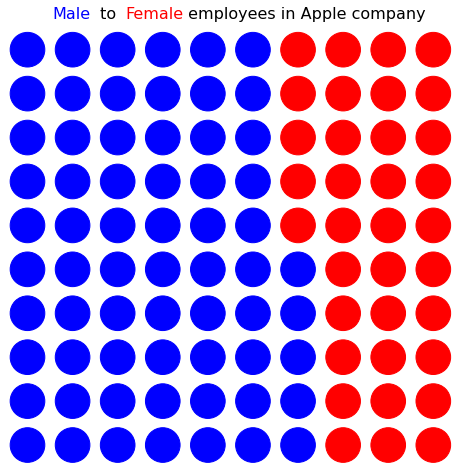

In [190]:
# 2. Dot matrix chart: dado que no se han encontrado librerías que generen dot matrix charts de forma más sofisticada,
#    realizaremos una simple matriz de puntos 10x10

# Inicialización de variables y lectura de datos

fig = plt.figure(figsize=(8, 8))
df_dot_matrix = pd.read_csv('./dot matrix plot.csv', sep=';')
x = []
y = []
color = []
labels = ['Male', 'Female']
iteration = 0

# Cuerpo de la iteración: pintamos cada punto según su categoría

for i in range(10):
    for j in range(10):
        x.append(i)
        y.append(j)
        c = 'blue' if i*10 + j < 100 - df_dot_matrix['% Female'][0] else 'red'
        color.append(c)
        
plt.scatter(x, y, s=1200, c=color)


plt.figtext(0.27, 0.90, "Male", fontsize=16, color='b', ha ='right')
plt.figtext(0.33, 0.90, "Female", fontsize=16, color='r', ha ='left')
plt.figtext(0.30, 0.90, ' to ', fontsize=16, color='k', ha ='center')
plt.figtext(0.43, 0.90, ' employees in Apple company', fontsize=16, color='k', ha ='left')

plt.axis('off')

plt.show()

Text(0, 0.5, 'Category')

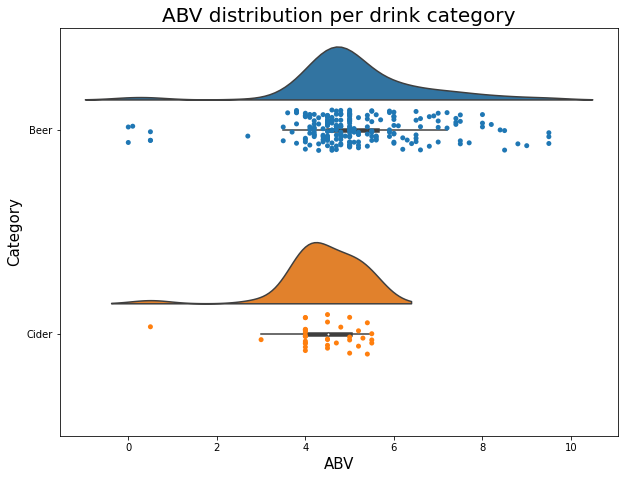

In [191]:
# 3. Rain cloud plot: seaborn y ptitprince seguramente deban ser instaladas aparte, de nuevo usando '! pip install $package'

import ptitprince as pt
import seaborn as sns

# Cargamos los datos y realizamos algunas operaciones básicas de limpieza de datos

df_rain_cloud = pd.read_csv('./open_units.csv')
df_rain_cloud = df_rain_cloud[(df_rain_cloud['volume'] == 330) & (df_rain_cloud['package'] == 'bottle')]

f, ax = plt.subplots(figsize=(10, 7.5))
ax = pt.half_violinplot(x="abv", y="category", data=df_rain_cloud, width = .6)
ax = sns.stripplot(x="abv", y="category", data=df_rain_cloud)
ax.set_title("ABV distribution per drink category", size=20)
ax.set_xlabel("ABV", size=15)
ax.set_ylabel("Category", size=15)